In [5]:
spark = (SparkSession.builder
         .appName("Pertemuan9")
         .config("spark.ui.showConsoleProgress", "false")
         .getOrCreate())
spark.sparkContext.setLogLevel("ERROR")

import logging
logging.getLogger("py4j").setLevel(logging.ERROR)
logging.getLogger("pyspark").setLevel(logging.ERROR)



25/10/29 10:34:10 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SparkJupyterTest").getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

df = spark.createDataFrame(data, schema=columns)
df.show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+



In [7]:
# Latihan 1
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [8]:
# Latihan 2
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [9]:
# Tugas 2.1
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
''').show()


+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+



In [10]:
# Tugas 2.2 
spark.sql('''
SELECT Gender, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY Gender
''').show()


+------+---------+
|Gender|AvgSalary|
+------+---------+
|     M|   2850.0|
|     F|   4100.0|
+------+---------+



In [13]:
# Tugas 2.3
spark.sql('''
SELECT Name, DeptId, Salary,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()


+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



In [11]:
# Latihan 3
spark.sql('''
SELECT Name, Age, Salary,
       ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS Rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|Rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [12]:
# Latihan 4
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [13]:
# Latihan 5(Mandiri)
spark.sql('''
SELECT e.Name, d.DeptName, e.Salary,
       AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS AvgDeptSalary,
       RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankInDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()


+-----+---------+------+-------------+----------+
| Name| DeptName|Salary|AvgDeptSalary|RankInDept|
+-----+---------+------+-------------+----------+
|James|       HR|  3000|       2850.0|         1|
|  Lee|       HR|  2700|       2850.0|         2|
| Anna|Marketing|  4100|       4100.0|         1|
+-----+---------+------+-------------+----------+



In [14]:
# Latihan 6(Mandiri)
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, e.Salary,
       AVG(e.Salary) OVER (PARTITION BY d.DeptName ORDER BY e.Age ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS SalaryTrend
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''').show()


+-----+---+---------+------+-----------+
| Name|Age| DeptName|Salary|SalaryTrend|
+-----+---+---------+------+-----------+
|  Lee| 23|       HR|  2700|     2700.0|
|James| 34|       HR|  3000|     2850.0|
| Anna| 28|Marketing|  4100|     4100.0|
+-----+---+---------+------+-----------+



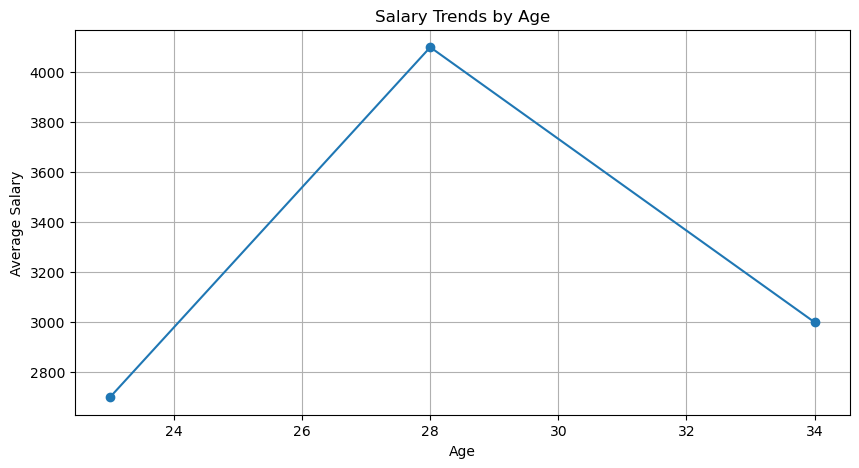

In [16]:

import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()
